In [1]:
#############Time series analysis of Precipitation data######################

In [2]:
import netCDF4 as nc
mypath = 'C:\Users\yguo20\Desktop\Climate Predictability/';
dataset = nc.Dataset(mypath+'precip.mon.mean.nc','r');
dataset.variables
lat = dataset.variables['lat'][:];
lon = dataset.variables['lon'][:];
time = dataset.variables['time'][:]; ###1979.1-2018.9
precip = dataset.variables['precip'][:];

In [3]:
####pick up one point over central india
import numpy as np
ilat = np.where(lat<=22)[0][0];
ilon = np.where(lon>=78)[0][0];
lat0 = lat[ilat]; lon0 = lon[ilon];
precip0 = precip[:,ilat,ilon];

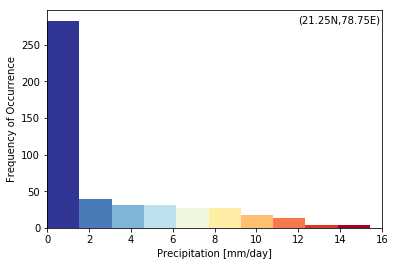

In [5]:
####histogram for all months at (21.25N,78.75E)
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu_r')
n, bins, patches = plt.hist(precip0, color='green');
plt.xlim(xmin=0,xmax=16);
bin_centers = 0.5 * (bins[:-1] + bins[1:]);
col = bin_centers - min(bin_centers);# scale values to interval [0,1]
col /= max(col);
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.xlabel('Precipitation [mm/day]'); plt.ylabel("Frequency of Occurrence");
plt.text(12,280,'(21.25N,78.75E)'); plt.show()

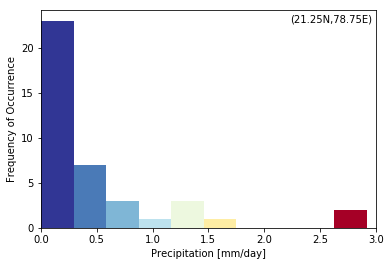

In [6]:
####histogram for all January at (21.25N,78.75E)
t_Jan = np.arange(0,477,12);
precip0_Jan = precip0[t_Jan];
cm = plt.cm.get_cmap('RdYlBu_r')
n, bins, patches = plt.hist(precip0_Jan, color='green');
plt.xlim(xmin=0,xmax=3.0);
bin_centers = 0.5 * (bins[:-1] + bins[1:]);
col = bin_centers - min(bin_centers);# scale values to interval [0,1]
col /= max(col);
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.xlabel('Precipitation [mm/day]'); plt.ylabel('Frequency of Occurrence');
plt.text(2.23,22.8,'(21.25N,78.75E)');

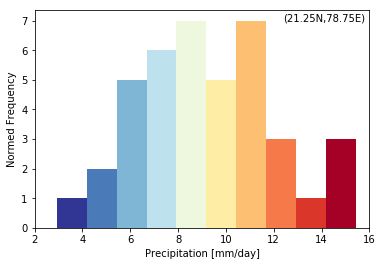

In [7]:
####histogram for all July at (21.25N,78.75E)
t_July = np.arange(6,477,12);
precip0_July = precip0[t_July];
cm = plt.cm.get_cmap('RdYlBu_r')
n, bins, patches = plt.hist(precip0_July, color='green');
plt.xlim(xmin=2,xmax=16.0);
bin_centers = 0.5 * (bins[:-1] + bins[1:]);
col = bin_centers - min(bin_centers);# scale values to interval [0,1]
col /= max(col);
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.xlabel('Precipitation [mm/day]'); plt.ylabel('Normed Frequency');
plt.text(12.4,7,'(21.25N,78.75E)');

In [8]:
####pick up one point over western equatorial pacific
ilat = np.where(lat<=5)[0][0];
ilon = np.where(lon>=144)[0][0];
lat0 = lat[ilat]; lon0 = lon[ilon];
precip0 = precip[:,ilat,ilon];

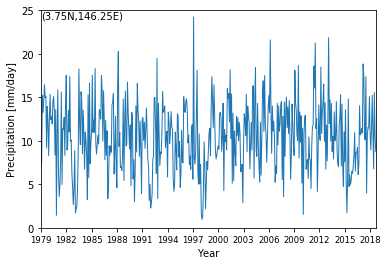

In [9]:
####time series at (3.75N,146.25E)
plt.plot(precip0,linewidth=1);
plt.xlabel('Year'); plt.ylabel('Precipitation [mm/day]');
plt.xlim(0,476); plt.ylim(0,25);
xticks = np.arange(0,477,36); xtickslabel = np.arange(1979,2019,3);
plt.xticks(xticks,xtickslabel,fontsize=8.5)
plt.text(0,24,'(3.75N,146.25E)');
plt.show()

In [10]:
####area-averaged domain 5S-5N,140E-160E
Lat1 = -5; Lat2 = 5; Lon1 = 140; Lon2 = 160;
ilat = np.where((lat<=Lat2) &(lat>=Lat1))[0];
ilon = np.where((lon<=Lon2) &(lon>=Lon1))[0];
lat0 = lat[ilat]; lon0 = lon[ilon];
precip0 = precip[:,ilat[0]:ilat[-1]+1,ilon[0]:ilon[-1]+1];
precip1 = np.sum(np.sum(precip0,axis=1),axis=1)/ilat.size/ilon.size;

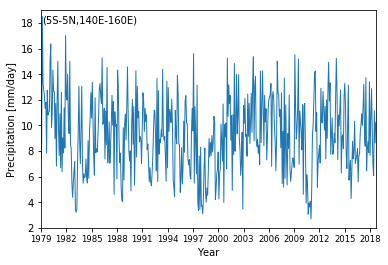

In [11]:
####time series at (3.75N,146.25E)
plt.plot(precip1,linewidth=1);
plt.xlabel('Year'); plt.ylabel('Precipitation [mm/day]');
plt.xlim(0,476); plt.ylim(2,19);
xticks = np.arange(0,477,36); xtickslabel = np.arange(1979,2019,3);
plt.xticks(xticks,xtickslabel,fontsize=8.5)
plt.text(1,18,'(5S-5N,140E-160E)')
plt.show()

In [12]:
####pick up one point over North Atlantic
ilat = np.where(lat<=45)[0][0];
ilon = np.where(lon>=180+180-25)[0][0];   ###-25W
lat0 = lat[ilat]; lon0 = lon[ilon];
precip0 = precip[:,ilat,ilon];

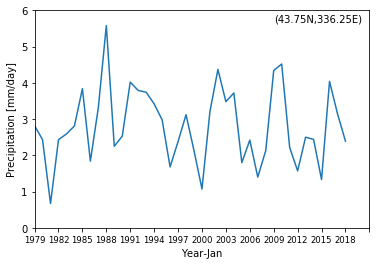

In [13]:
####time series at (43.75N,336.25E) for January
t_Jan = np.arange(0,477,12);
precip0_Jan = precip0[t_Jan];
plt.plot(precip0_Jan)
plt.xlabel('Year-Jan'); plt.ylabel('Precipitation [mm/day]');
plt.xlim(0,39); plt.ylim(0,6);
xticks = np.arange(0,43,3); xtickslabel = np.arange(1979,2019,3);
plt.xticks(xticks,xtickslabel,fontsize=8.5)
plt.text(30,5.7,'(43.75N,336.25E)')
plt.show()

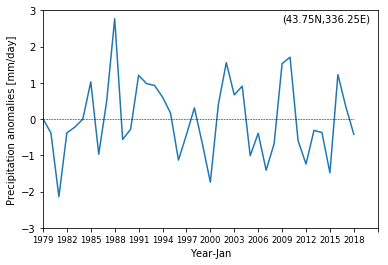

In [14]:
####anomaly time series at (43.75N,336.25E) for January
t_Jan = np.arange(0,477,12);
precip0_Jan = precip0[t_Jan];
mean = np.mean(precip0_Jan); t_mean = np.zeros(t_Jan.size);
Anomaly = precip0_Jan-mean;
plt.plot(Anomaly); plt.plot(t_mean,'--k',linewidth=0.5);
plt.xlabel('Year-Jan'); plt.ylabel('Precipitation anomalies [mm/day]');
plt.xlim(0,39); plt.ylim(-3,3);
xticks = np.arange(0,43,3); xtickslabel = np.arange(1979,2019,3);
plt.xticks(xticks,xtickslabel,fontsize=8.5)
plt.text(30,2.7,'(43.75N,336.25E)')
plt.show()

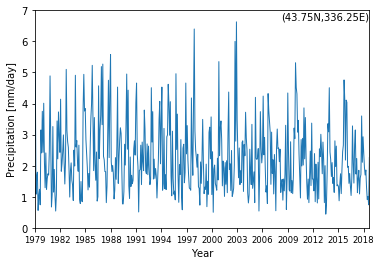

In [15]:
####time series at (43.75N,336.25E) for all months
plt.plot(precip0,linewidth=1);
plt.xlabel('Year'); plt.ylabel('Precipitation [mm/day]');
xticks = np.arange(0,477,36); xtickslabel = np.arange(1979,2019,3);
plt.xlim(0,476); plt.ylim(0,7);
plt.xticks(xticks,xtickslabel,fontsize=8.5)
plt.text(350,6.7,'(43.75N,336.25E)')
plt.show()

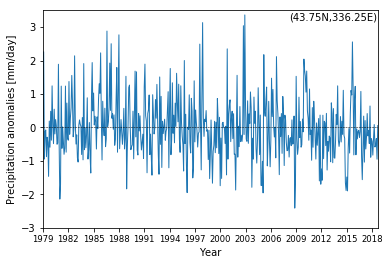

In [16]:
####anomaly time series at (43.75N,336.25E) for all months
anomaly = np.zeros(precip0.size);
for mon in range(12):
    t1 = np.arange(mon,477,12);
    precip1 = precip0[t1];
    mean1 = np.mean(precip1);
    anomaly[t1] = precip0[t1]-mean1;

t_mean = np.zeros(precip0.size);
plt.plot(anomaly,linewidth=1); plt.plot(t_mean,'--k',linewidth=0.5);
plt.xlabel('Year'); plt.ylabel('Precipitation anomalies [mm/day]');
xticks = np.arange(0,477,36); xtickslabel = np.arange(1979,2019,3);
plt.xticks(xticks,xtickslabel,fontsize=8.5)
plt.xlim(0,476); plt.ylim(-3,3.5);
plt.text(350,3.2,'(43.75N,336.25E)')
plt.show()